In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('haberman.csv', header = 0)
df.columns = ['patient_age', 'operation_year', 'positive_axillary_nodes', 'survival_status']

In [3]:
df.shape

(305, 4)

In [4]:
label=['Age','Year','positive axillary nodes','Survival status']

In [5]:
df=pd.read_csv('haberman.csv',names=label)

In [6]:
df['Survival status'].value_counts()

1    225
2     81
Name: Survival status, dtype: int64

In [7]:
df.head()

,Age,Year,positive axillary nodes,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


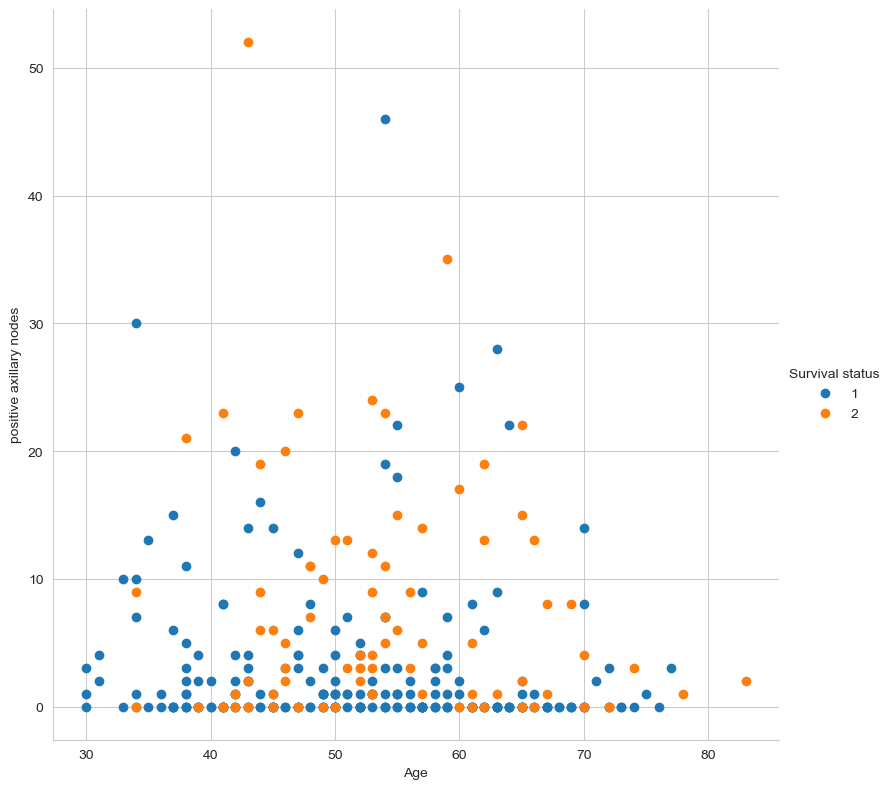

In [8]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Survival status',height=8).map(plt.scatter,'Age','positive axillary nodes').add_legend()
plt.show()

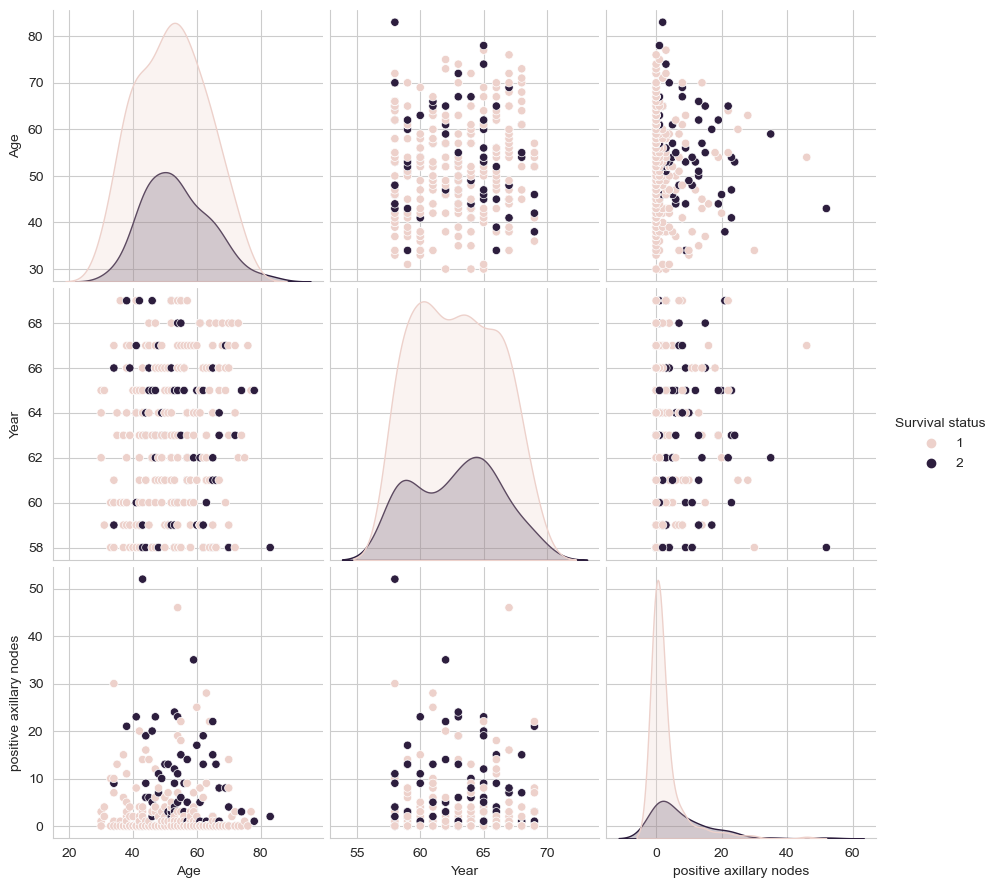

In [9]:
sns.set_style('whitegrid')
sns.pairplot(df,hue='Survival status',height=3)
plt.show()

In [10]:
status2=df.loc[df['Survival status']==2]

In [11]:
counts,binedges=np.histogram(status2['positive axillary nodes'],bins=10)

In [12]:
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)

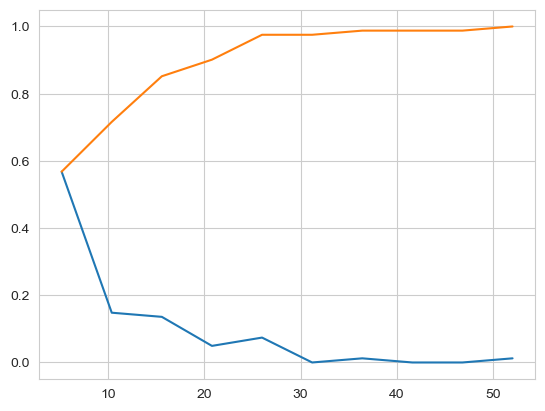

In [13]:
plt.plot(binedges[1:],pdf)
plt.plot(binedges[1:],cdf)

<Axes: xlabel='Survival status', ylabel='Age'>

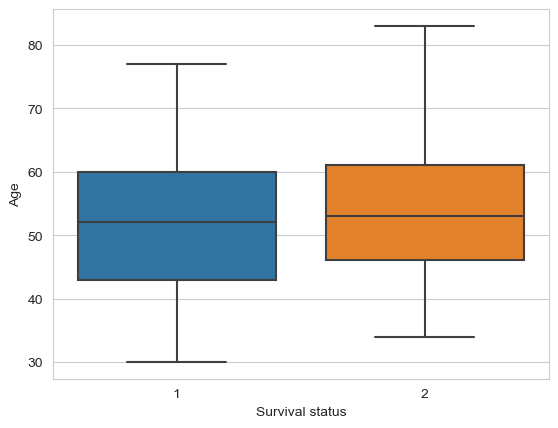

In [14]:
sns.boxplot(x='Survival status',y='Age',data=df)

In [15]:
df.columns

Index(['Age', 'Year', 'positive axillary nodes', 'Survival status'], dtype='object')

In [16]:
#to rename the columns of the dataset
df.columns = ["age", "operation_year", "axl_lymph_node", "survival_status"]


In [17]:
df.columns

Index(['age', 'operation_year', 'axl_lymph_node', 'survival_status'], dtype='object')

In [18]:
df.shape

(306, 4)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              306 non-null    int64
 1   operation_year   306 non-null    int64
 2   axl_lymph_node   306 non-null    int64
 3   survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [20]:
df.describe()

,age,operation_year,axl_lymph_node,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [21]:
df.isnull().any()

age                False
operation_year     False
axl_lymph_node     False
survival_status    False
dtype: bool

In [22]:
#print the unique values in survival_status feature
print(list(df['survival_status'].unique()))

[1, 2]


In [23]:
#count the values in "survival_status"
df.survival_status.value_counts()

1    225
2     81
Name: survival_status, dtype: int64

In [24]:
#convert "survival_status" to categorical where Class Label of "survival_status" are labelled as "yes" for 1 i.e patients who survived 5 years or longer and "no" for 2 i.e patients who died within 5 years of the operation
df['survival_status'] = df['survival_status'].map({1:"yes", 2:"no"})
df['survival_status'] = df['survival_status'].astype('category')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              306 non-null    int64   
 1   operation_year   306 non-null    int64   
 2   axl_lymph_node   306 non-null    int64   
 3   survival_status  306 non-null    category
dtypes: category(1), int64(3)
memory usage: 7.7 KB


In [26]:
#distribution of classes in the Haberman dataset
df["survival_status"].value_counts(1)

yes    0.735294
no     0.264706
Name: survival_status, dtype: float64

In [27]:
df.head()

,age,operation_year,axl_lymph_node,survival_status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


# Analysis using Central Tendency and Variability of the Dataset

In [28]:
print("STATISTICS for class label : yes")
desc_yes=df.loc[df["survival_status"]=="yes"]
print(desc_yes.describe())

STATISTICS for class label : yes
              age  operation_year  axl_lymph_node
count  225.000000      225.000000      225.000000
mean    52.017778       62.862222        2.791111
std     11.012154        3.222915        5.870318
min     30.000000       58.000000        0.000000
25%     43.000000       60.000000        0.000000
50%     52.000000       63.000000        0.000000
75%     60.000000       66.000000        3.000000
max     77.000000       69.000000       46.000000


# Observations:
There are 224 people who survived 5 years and beyond.
The minimum age of people who survived 30.
The maximum age of people who survived 77.
The mean age of the people who survived 52.
The minimum positive axillary nodes 0 and maximum positive axillary nodes 46 for the people who survived.
The survived 224 people had on an average of 0-3 positive axillary nodes.

In [29]:
print("STATISTICS for class label : no")
desc_no=df.loc[df["survival_status"]=="no"]
print(desc_no.describe())

STATISTICS for class label : no
             age  operation_year  axl_lymph_node
count  81.000000       81.000000       81.000000
mean   53.679012       62.827160        7.456790
std    10.167137        3.342118        9.185654
min    34.000000       58.000000        0.000000
25%    46.000000       59.000000        1.000000
50%    53.000000       63.000000        4.000000
75%    61.000000       65.000000       11.000000
max    83.000000       69.000000       52.000000


# Observations:
There are 81 people who died within 5 years.
The minimum age of people who died 34.
The maximum age of people who died 83.
The mean age of people who died 53.
The minimum positive axillary nodes 0 and maximum positive axillary nodes 52 for the people who died.
81 people on an average had 0-7 positive axillary nodes.

In [30]:
print("Medians of class label: yes :\n")
print("Median age of the people who survived : ",np.median(desc_yes["age"]))
print("Median Positive axillary nodes in the people who survived : ", np.median(desc_yes["axl_lymph_node"]))

Medians of class label: yes :

Median age of the people who survived :  52.0
Median Positive axillary nodes in the people who survived :  0.0


# Observation:
The people who survived had 0 axillary lymph nodes on an average.
The number of axillary lymph nodes is known to be positively skewed, with a long tail to the right. This is because there are a few patients with a large number of axillary lymph nodes, while most patients have relatively few axillary lymph nodes. (mean and median value differ for axillary lymph nodes).

In [31]:
print("Medians of class label: no :\n")
print("Median age of the people who could not survive : ", np.median(desc_no["age"]))
print("Median Positive axillary nodes in the people who could not survive :  ", np.median(desc_no["axl_lymph_node"]))

Medians of class label: no :

Median age of the people who could not survive :  53.0
Median Positive axillary nodes in the people who could not survive :   4.0


# Observation:
The people who did not survive had 4 axillary lymph nodes on an average.

In [32]:
print("Quantiles of class label: yes\n")
print("Age :",np.percentile(desc_yes["age"], np.arange(0, 100, 25)))
print("Axillary lymph nodes : ", np.percentile(desc_yes["axl_lymph_node"], np.arange(0,100,25)))

Quantiles of class label: yes

Age : [30. 43. 52. 60.]
Axillary lymph nodes :  [0. 0. 0. 3.]


# Observation:
The 50% of patients who survived had 0 Axillary lymph node.
The 75% of patients who survived had 3 Axillary lymph nodes.

In [33]:
print("Quantiles of class label: no\n")
print("Age :",np.percentile(desc_no["age"], np.arange(0, 100, 25)))
print("Axillary lymph nodes : ", np.percentile(desc_no["axl_lymph_node"], np.arange(0,100,25)))

Quantiles of class label: no

Age : [34. 46. 53. 61.]
Axillary lymph nodes :  [ 0.  1.  4. 11.]


# Observations:
The 50% of patients who died had 4 Axillary lymph nodes.
The 75% of patients who died had 11 Axillary lymph nodes.

# Analysis using Data Visualization
To improve the classification accuracy and select the most informative features, we can leverage the three available features. We can use pairplots to visualize different combinations of features and identify the best feature pair for further analysis.

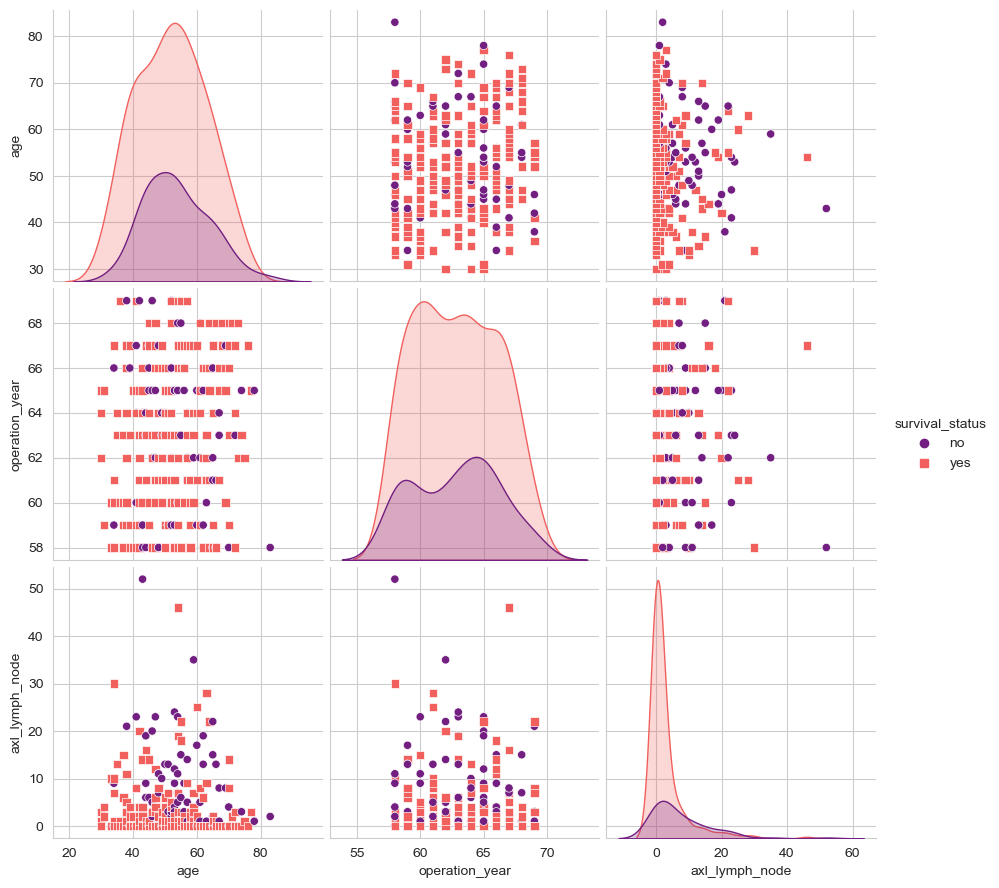

In [34]:
#PAIR PLOT
plt.close()

sns.set_style("whitegrid")
sns.pairplot(data=df, hue="survival_status", height=3, vars=['age', 'operation_year', 'axl_lymph_node'], markers=["o", "s"], palette = 'magma')
plt.show()

# Observation:
Plot 2 (operation_year, age): There is a huge overlap between the class labels and the datapoints cannot be distinguished. Also, Plot 2 and Plot 4 are same.
Plot 3(axl_lymph_node,age): There is overlap between the class labels but there is a large amount of datapoints at 0 axl_lymph_node, so the datapoints are distinguishable but the correct analysis of it could be performed using PDF and CDF.Also, Plot 3 and Plot 7 are same.
Plot 6 (axl_lymph_node,operation_year): There is a huge overlap between the class labels and the datapoints cannot be distinguished. Also, Plot 6 and Plot 8 are same.
The diagonal plots are PDF's of the features. Among them, 'axl_lymph_node' seems useful for the classification because of the distribution.
Pairplots are not linearly separable.

The datapoints are overlapping.

C:\Users\gky16\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\gky16\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


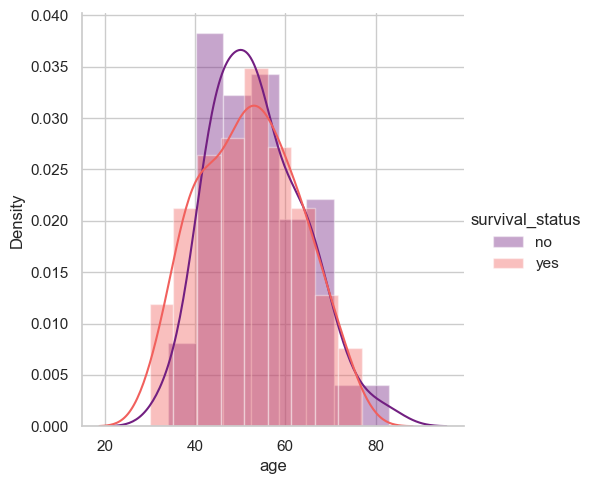

In [35]:
#plot distributiion of age
sns.set(style="whitegrid")
#custom_colors = sns.color_palette("Spectral")
g = sns.FacetGrid(df,hue='survival_status', height=5, palette = 'magma')
g.map(sns.distplot,'age')
g.add_legend()

plt.show()

# Observation:
The age range of 30- 78 of the cancer patients who survived and died seem to overlap for this range so no clear observation could be drawn from the age attribute

C:\Users\gky16\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\gky16\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


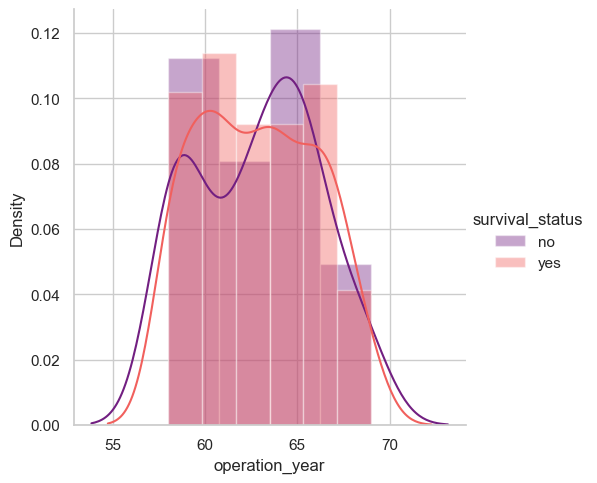

In [36]:
0,1#plot distributiion of operation_year
sns.set(style="whitegrid")
g = sns.FacetGrid(df,hue='survival_status', height=5, palette = 'magma')
g.map(sns.distplot,'operation_year')
g.add_legend()

plt.show()


# Observation:
A huge overlap can be observed for both the classes but considering the density we observe the death rate has increased for the operation year 1964-1966 but also the survival rate in the year 1960 seems to be dense

C:\Users\gky16\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\gky16\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


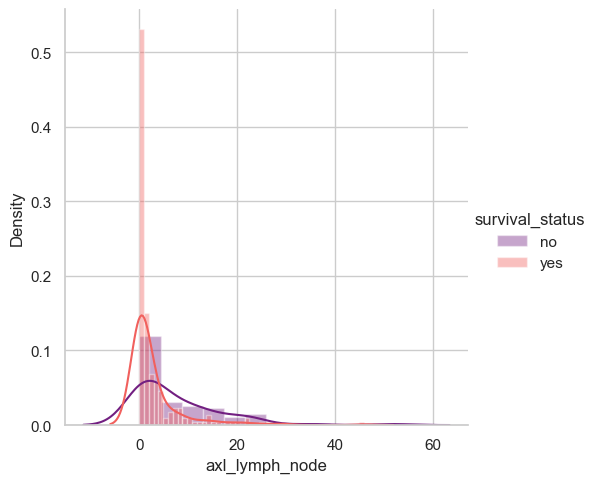

In [37]:
#plot distributiion of axillary_lymph_node
sns.set(style="whitegrid")
g = sns.FacetGrid(df,hue='survival_status', height=5, palette = 'magma')
g.map(sns.distplot,'axl_lymph_node')
g.add_legend()

plt.show()

# Observation:
Patients with a few (0-3) axillary lymph node seem to have the highest survival rate. Also, the attribute axillary lymph node seems to give an idea for classification of the survival status of cancer patients.

In [38]:
# Extract the 'axil_lymph_node' column from haberman_df
axl_lymph_node =df['axl_lymph_node']

# Compute the histogram using the specified number of bins
hist, bin_edges = np.histogram(axl_lymph_node, bins=10, density=True)

# Compute the pdf
pdf = hist/sum(hist)

# Compute the CDF using the cumulative sum of the PDF
cdf = np.cumsum(pdf)

# Print the computed values
print("Bins:", bin_edges)
print("PDF:", pdf)
print("CDF:", cdf)

Bins: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


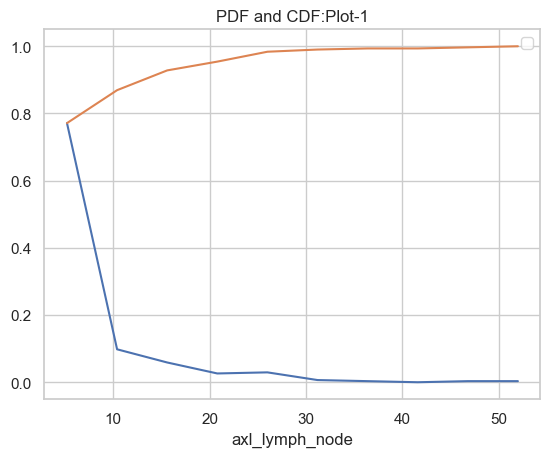

In [39]:
plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
plt.xlabel(axl_lymph_node.name)  
plt.legend()
plt.title('PDF and CDF:Plot-1')
plt.show()

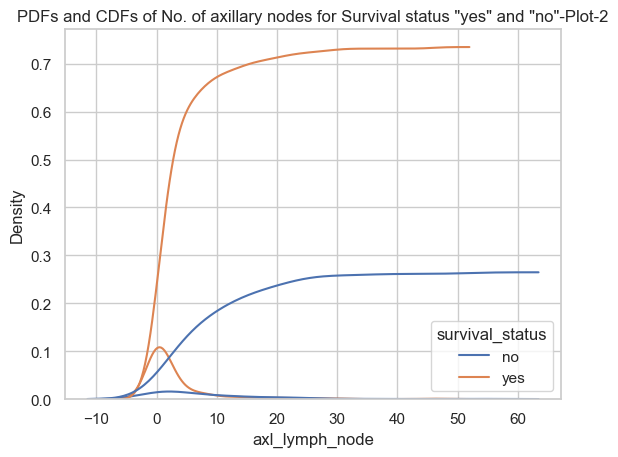

In [40]:
#PDF and CDF based on survival status
sns.kdeplot(data=df,x='axl_lymph_node',hue='survival_status')
sns.kdeplot(data=df,x='axl_lymph_node',hue='survival_status',cumulative=True)
plt.title('PDFs and CDFs of No. of axillary nodes for Survival status "yes" and "no"-Plot-2')
plt.show()

# Observation:¶
The patients having axillary nodes less than 10 has a good survival status of 80%-83%.(Plot-1)
The patients with axillary nodes >40 have very low survival chance. (Plot-2)


In [41]:
# Extract the 'age' column from haberman_df
age =df['age']

# Compute the histogram using the specified number of bins
hist, bin_edges = np.histogram(age, bins=10, density=True)

# Compute the pdf
pdf = hist/sum(hist)

# Compute the CDF using the cumulative sum of the PDF
cdf = np.cumsum(pdf)

# Print the computed values
print("Bins:", bin_edges)
print("PDF:", pdf)
print("CDF:", cdf)

Bins: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


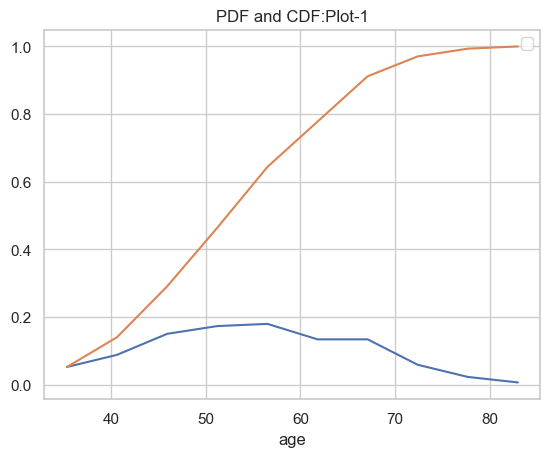

In [42]:
plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
plt.xlabel(age.name)  
plt.legend()
plt.title('PDF and CDF:Plot-1')
plt.show()

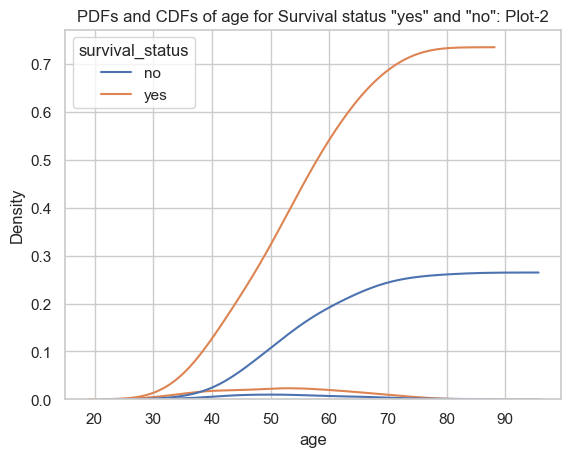

In [43]:
#PDF and CDF based on survival status
sns.kdeplot(data=df,x='age',hue='survival_status')
sns.kdeplot(data=df,x='age',hue='survival_status',cumulative=True)
plt.title('PDFs and CDFs of age for Survival status "yes" and "no": Plot-2')
plt.show()

# Observation:
98% of patients who survived were below the age of 70. (Plot-1)
There were 69% of patients whose age was less than 70 who survived 5 or more years after operation. There were 31% of patients whose age was less than 70 who couldn't survived less than 5 years.(Plot-2)

In [44]:
# Extract the 'operation_year' column from haberman_df
operation_year =df['operation_year']

# Compute the histogram using the specified number of bins
hist, bin_edges = np.histogram(operation_year, bins=10, density=True)

# Compute the pdf
pdf = hist/sum(hist)

# Compute the CDF using the cumulative sum of the PDF
cdf = np.cumsum(pdf)

# Print the computed values
print("Bins:", bin_edges)
print("PDF:", pdf)
print("CDF:", cdf)

Bins: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


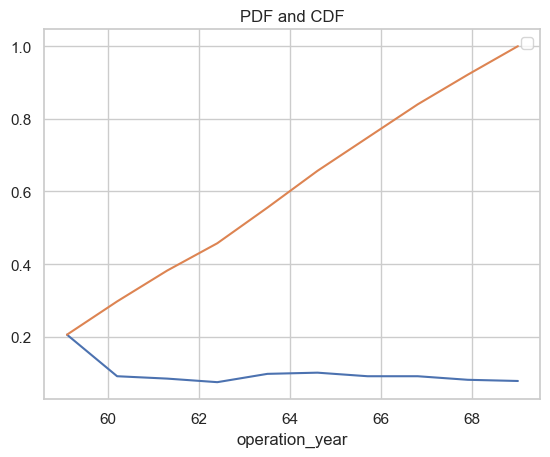

In [45]:
plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
plt.xlabel(operation_year.name)  
plt.legend()
plt.title('PDF and CDF')
plt.show()

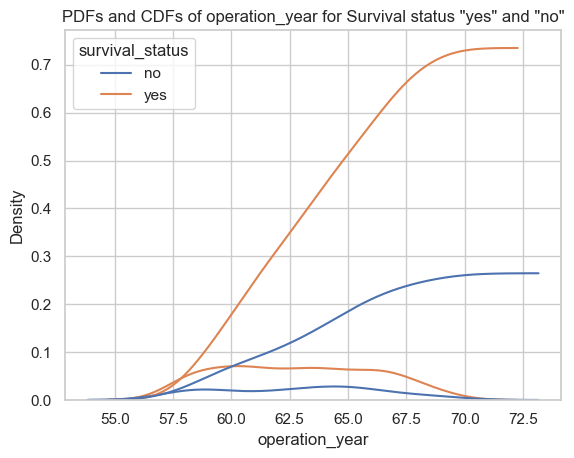

In [46]:
#PDF and CDF based on survival status
sns.kdeplot(data=df,x='operation_year',hue='survival_status')
sns.kdeplot(data=df,x='operation_year',hue='survival_status',cumulative=True)
plt.title('PDFs and CDFs of operation_year for Survival status "yes" and "no"')
plt.show()

# Observation:
NO clear conclusion

Text(0, 0.5, 'age')

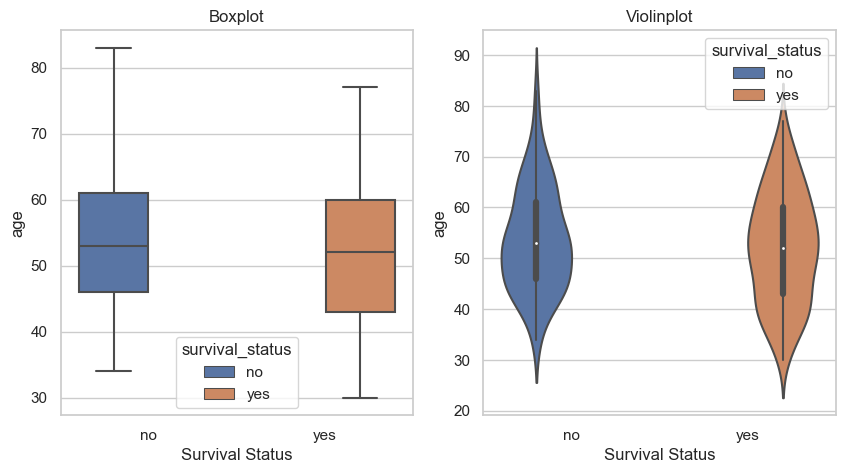

In [47]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(ax=axes[0],data=df, x="survival_status", y="age", hue="survival_status")
axes[0].set_title('Boxplot')
axes[0].set_xlabel('Survival Status')
axes[0].set_ylabel('age')

sns.violinplot(ax=axes[1],data=df, x="survival_status", y="age", hue="survival_status")
axes[1].set_title('Violinplot')
axes[1].set_xlabel('Survival Status')
axes[1].set_ylabel('age')

# Observation:
No clear conclusion.

Observation Violin Plot:
The survival rate is high between the age 48-55.

Text(0, 0.5, 'operation_year')

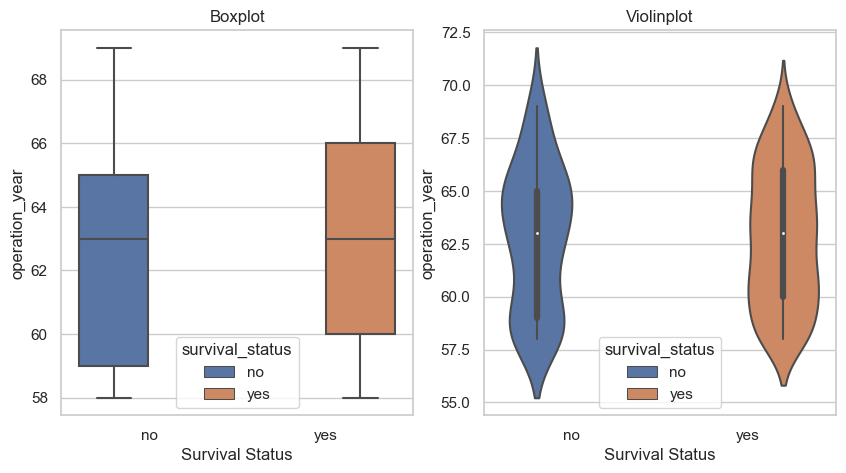

In [48]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(ax=axes[0],data=df, x="survival_status", y="operation_year", hue="survival_status")
axes[0].set_title('Boxplot')
axes[0].set_xlabel('Survival Status')
axes[0].set_ylabel('operation_year')

sns.violinplot(ax=axes[1],data=df, x="survival_status", y="operation_year", hue="survival_status")
axes[1].set_title('Violinplot')
axes[1].set_xlabel('Survival Status')
axes[1].set_ylabel('operation_year')

# Observation Box Plot:
NO clear Conclusion.

Observation Violin Plot:
After the year 1960 the survival rate increased and remained constant.

Text(0, 0.5, 'axl_lymph_node')

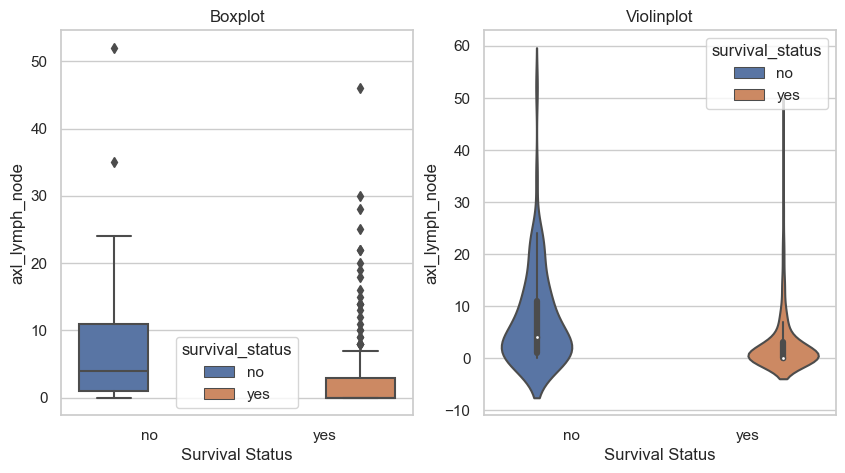

In [49]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(ax=axes[0],data=df, x="survival_status", y="axl_lymph_node", hue="survival_status")
axes[0].set_title('Boxplot')
axes[0].set_xlabel('Survival Status')
axes[0].set_ylabel('axl_lymph_node')

sns.violinplot(ax=axes[1],data=df, x="survival_status", y="axl_lymph_node", hue="survival_status")
axes[1].set_title('Violinplot')
axes[1].set_xlabel('Survival Status')
axes[1].set_ylabel('axl_lymph_node')